In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import random
from colorama import Fore

In [17]:
# macd strategy
# predictions = pd.read_csv('training_data_non_model.csv')
predictions = pd.read_csv('testing_data_non_model.csv')
increase_factor = 1.5

In [18]:
# dataset = predictions.copy()
dataset = predictions.copy()

In [19]:
dataset["new_rfr"] = dataset["daily_risk_free_rate"] * increase_factor

In [20]:
def ewma(data, window):
    return data.ewm(span=window).mean()

twelve_day_ewma = ewma(dataset['Close'], 12)
twenty_six_day_ewma = ewma(dataset['Close'], 26)

macd = twelve_day_ewma - twenty_six_day_ewma
macd_signal = ewma(macd, 9)
macd_hist = macd - macd_signal

In [21]:
dataset

Date       Open       High        Low      Close  Adj Close  \
0    2018-03-14  34.410000  34.680000  34.410000  34.630001  29.946875   
1    2018-03-15  34.619999  34.680000  34.560001  34.639999  29.955515   
2    2018-03-16  34.520000  34.549999  34.439999  34.520000  29.851736   
3    2018-03-19  34.369999  34.560001  34.330002  34.410000  29.756618   
4    2018-03-20  34.230000  34.340000  34.230000  34.270000  29.635569   
..          ...        ...        ...        ...        ...        ...   
448  2019-12-23  39.290001  39.320000  39.060001  39.160000  35.542130   
449  2019-12-24  39.029999  39.330002  39.020000  39.290001  35.660110   
450  2019-12-26  39.320000  39.400002  39.200001  39.389999  35.750870   
451  2019-12-27  39.459999  39.509998  39.419998  39.419998  35.778091   
452  2019-12-30  39.040001  39.310001  38.959999  39.310001  35.678268   

     Volume    return  excess return  daily_risk_free_rate   new_rfr  
0     91300  0.007858       0.007801              0.000056  0.000085  
1     40200  0.000289       0.000232              0.000057  0.000085  
2     42000 -0.003464      -0.003521              0.000057  0.000085  
3     55000 -0.003186      -0.003243              0.000057  0.000085  
4     34500 -0.004068      -0.004125              0.000057  0.000086  
..      ...       ...            ...                   ...       ...  
448  419900 -0.002038      -0.002100              0.000062  0.000092  
449  164100  0.003319       0.003258              0.000062  0.000092  
450  242300  0.002545       0.002484              0.000062  0.000092  
451  155700  0.000761       0.000700              0.000062  0.000092  
452  523900 -0.002790      -0.002852              0.000062  0.000092  

[453 rows x 11 columns]

In [22]:
dataset['12-ewma'] = twelve_day_ewma
dataset['26-ewma'] = twenty_six_day_ewma
dataset['MACD'] = macd
dataset['MACD Signal'] = macd_signal
dataset['MACD Hist'] = macd_hist

In [23]:
def find_signal(dataset):
    data = dataset.copy()
    data["signal"] = 0
    
    for i in range(1, len(data)):
        # we buy if the MACD line crosses above the signal line
        if data['MACD'].iloc[i] > data['MACD Signal'].iloc[i] and data['MACD'].iloc[i-1] < data['MACD Signal'].iloc[i-1]:
            data.loc[i, 'signal'] = 1
            
        # we sell if the MACD line crosses below the signal line
        elif data['MACD'].iloc[i] < data['MACD Signal'].iloc[i] and data['MACD'].iloc[i-1] > data['MACD Signal'].iloc[i-1]:
            data.loc[i, 'signal'] = -1
        else:
            data.loc[i, 'signal'] = 0
    return data

dataset = find_signal(dataset)
dataset

Date       Open       High        Low      Close  Adj Close  \
0    2018-03-14  34.410000  34.680000  34.410000  34.630001  29.946875   
1    2018-03-15  34.619999  34.680000  34.560001  34.639999  29.955515   
2    2018-03-16  34.520000  34.549999  34.439999  34.520000  29.851736   
3    2018-03-19  34.369999  34.560001  34.330002  34.410000  29.756618   
4    2018-03-20  34.230000  34.340000  34.230000  34.270000  29.635569   
..          ...        ...        ...        ...        ...        ...   
448  2019-12-23  39.290001  39.320000  39.060001  39.160000  35.542130   
449  2019-12-24  39.029999  39.330002  39.020000  39.290001  35.660110   
450  2019-12-26  39.320000  39.400002  39.200001  39.389999  35.750870   
451  2019-12-27  39.459999  39.509998  39.419998  39.419998  35.778091   
452  2019-12-30  39.040001  39.310001  38.959999  39.310001  35.678268   

     Volume    return  excess return  daily_risk_free_rate   new_rfr  \
0     91300  0.007858       0.007801              0.000056  0.000085   
1     40200  0.000289       0.000232              0.000057  0.000085   
2     42000 -0.003464      -0.003521              0.000057  0.000085   
3     55000 -0.003186      -0.003243              0.000057  0.000085   
4     34500 -0.004068      -0.004125              0.000057  0.000086   
..      ...       ...            ...                   ...       ...   
448  419900 -0.002038      -0.002100              0.000062  0.000092   
449  164100  0.003319       0.003258              0.000062  0.000092   
450  242300  0.002545       0.002484              0.000062  0.000092   
451  155700  0.000761       0.000700              0.000062  0.000092   
452  523900 -0.002790      -0.002852              0.000062  0.000092   

       12-ewma    26-ewma      MACD  MACD Signal  MACD Hist  signal  
0    34.630001  34.630001  0.000000     0.000000   0.000000       0  
1    34.635417  34.635192  0.000224     0.000125   0.000100       0  
2    34.590369  34.593805 -0.003435    -0.001334  -0.002101      -1  
3    34.533434  34.542421 -0.008987    -0.003927  -0.005060       0  
4    34.461860  34.479245 -0.017386    -0.007930  -0.009455       0  
..         ...        ...       ...          ...        ...     ...  
448  39.514002  39.703280 -0.189278    -0.106898  -0.082380       0  
449  39.479540  39.672667 -0.193127    -0.124144  -0.068983       0  
450  39.465765  39.651728 -0.185964    -0.136508  -0.049456       0  
451  39.458724  39.634563 -0.175840    -0.144374  -0.031465       0  
452  39.435843  39.610522 -0.174678    -0.150435  -0.024243       0  

[453 rows x 17 columns]

In [24]:
dataset.index = pd.to_datetime(dataset['Date'])

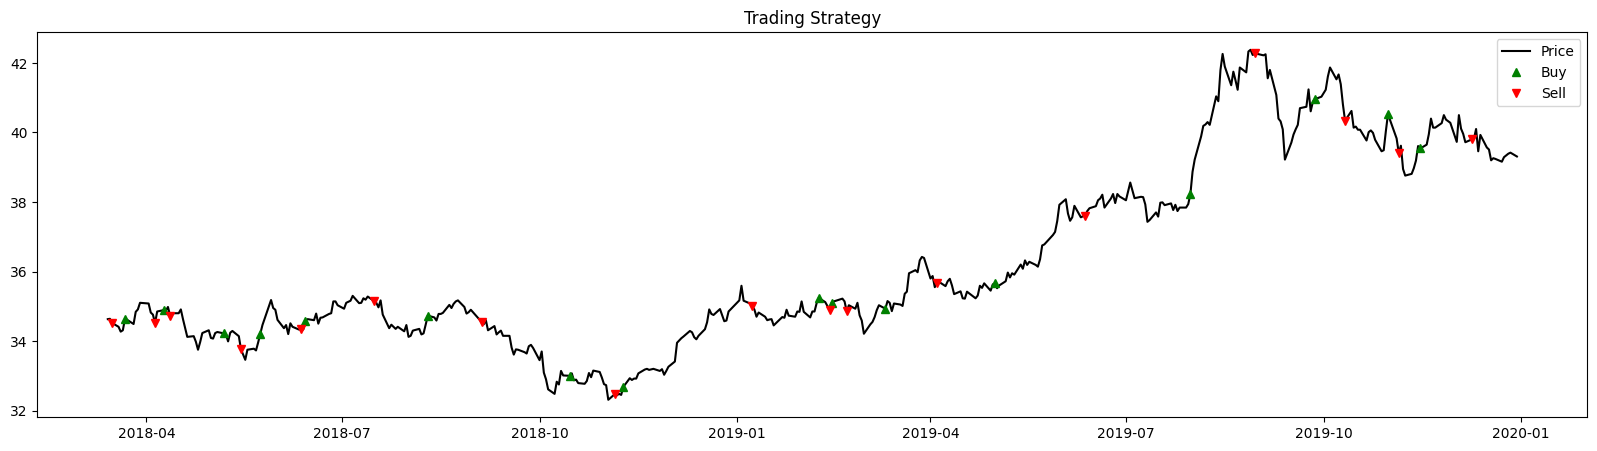

In [25]:
plt.figure(figsize=(20, 5))

plt.title('Trading Strategy')

# Plot main price line
plt.plot(dataset.index,dataset['Close'], label='Price', color='black')

# Differentiate buy and sell signals with markers and colors
buy_signals = dataset[dataset['signal'] == 1].index
sell_signals = dataset[dataset['signal'] == -1].index

plt.plot(buy_signals, dataset['Close'][buy_signals], marker='^', linestyle='', color='green', label='Buy')  # Green triangle for buy
plt.plot(sell_signals, dataset['Close'][sell_signals], marker='v', linestyle='', color='red', label='Sell')  # Red triangle for sell

plt.legend()
plt.show()

In [26]:

inital_cash = 200000
leverage_factor = 10
margin = [inital_cash]
position = [0]
cash = [inital_cash*leverage_factor]
previous_signal = 0
re = [0]

bank_account = [0]
high_bank_account = [0]

for i in range(0, len(dataset)-1):
    current_signal = dataset['signal'].iloc[i]
    current_price = dataset['Close'].iloc[i]
    current_rfr = dataset['daily_risk_free_rate'].iloc[i]
    current_high_rfr = dataset['new_rfr'].iloc[i]
    
    current_position = position[-1]
    current_cash = cash[-1]
    current_bank_account = bank_account[-1]
    current_high_bank_account = high_bank_account[-1]
    current_margin = margin[-1]
    current_re = re[-1]
    
    # if you were longing, and the price goes up and over the margin, then you can take the excess return
    if current_position * current_price > current_margin * leverage_factor:
        excess_return = current_position * current_price - current_margin * leverage_factor
        excess_stock = excess_return / current_price
        current_position -= excess_stock
        current_bank_account += excess_return
    
    # if you were shorting, and the price goes up and over the margin, then you can take the excess loss
    if (-current_position * current_price) > current_margin * leverage_factor:
        excess_return = (-current_position * current_price) - current_margin * leverage_factor
        excess_stock = excess_return / current_price
        current_position += excess_stock
    
    if current_signal == 0:
        if previous_signal == 1:
            if current_price < long_price:
                unit_loss = abs(long_price - current_price)
                loss = abs(current_position) * unit_loss
                if current_margin - loss <= 0:
                    print("Bank is calling back the loan")
                    break
                
        if previous_signal == -1:
            if current_price > short_price:
                unit_loss = abs(current_price - short_price)
                loss = abs(current_position) * unit_loss
                if current_margin - loss <= 0:
                    print("Bank is calling back the loan")
                    break
                
        if current_position > 0:
            current_re = (current_price - long_price) / long_price
            
        if current_position < 0:
            current_re = (short_price - current_price) / short_price
    
    if current_signal == 1:
        # if we are already in a short position, then we close the short position
        if previous_signal == -1:
            stock_for_short = abs(current_position)
            current_position = 0
            unit_profits = short_price - current_price
            profits = stock_for_short * unit_profits
            
            current_margin += profits
            current_re = unit_profits / short_price
            
            if current_margin <= 0:
                print("Bank is calling back the loan")
                break
            previous_signal = 0
            
        # if we closed the short position, or we are in a initial position, then we buy
        if previous_signal == 0:
            
            current_cash = current_margin * leverage_factor
            
            stock_to_buy = current_cash / current_price
            current_position += stock_to_buy
            long_price = current_price
            
            previous_signal = 1

    if current_signal == -1:
        if previous_signal == 1:
            stock_for_long = current_position
            current_position = 0
            unit_profits = current_price - long_price
            profits = stock_for_long * unit_profits
            
            current_margin += profits
            current_re = unit_profits / long_price
            
            if current_margin <= 0:
                print("Bank is calling back the loan")
                break
            
            previous_signal = 0
        
        if previous_signal == 0:
            
            current_cash = current_margin * leverage_factor
            
            stock_to_borrow = current_cash / current_price
            current_position -= stock_to_borrow
            short_price = current_price
            
            previous_signal = -1
    
    current_high_bank_account = current_bank_account
    current_interest = current_bank_account * current_rfr
    current_high_interest = current_high_bank_account * current_high_rfr
    current_bank_account += current_interest
    current_high_bank_account += current_high_interest
    
    re.append(current_re)
    margin.append(current_margin)
    position.append(current_position)
    cash.append(current_cash)
    bank_account.append(current_bank_account)
    high_bank_account.append(current_high_bank_account)

current_price = dataset['Close'].iloc[-1]
current_bank_account = bank_account[-1]

current_interest = current_bank_account * current_rfr
current_high_interest = current_high_bank_account * current_high_rfr
current_bank_account += current_interest
current_high_bank_account += current_high_interest

if current_position > 0:
    profits = current_position * (current_price - long_price)
    current_margin += profits
    current_position = 0
    current_re = (current_price - long_price) / long_price
if current_position < 0:
    profits = -current_position * (short_price - current_price)
    current_margin += profits
    current_position = 0
    current_re = (short_price - current_price) / short_price

bank_account.append(current_bank_account)
high_bank_account.append(current_high_bank_account)
re.append(current_re)
margin.append(current_margin)
position.append(current_position)
cash.append(current_cash)

In [27]:
report_df = pd.DataFrame({
    'margin': margin[1:],
    'position': position[1:],
    'cash': cash[1:],
    "bank_account": bank_account[1:],
    "bank_account_with_high_rfr": high_bank_account[1:],
    'excess_return': re[1:],
})
report_df.index = dataset.index

In [28]:
target_data = dataset.copy()
target_data = target_data.drop(columns=['Open', 'High', 'Low', 'Volume', 'Adj Close', "excess return", "return", "12-ewma", "26-ewma", "MACD", "MACD Signal", "MACD Hist"])
final_result = pd.concat([target_data, report_df], axis=1)

In [29]:
final_result["theta"] = final_result["position"] * final_result["Close"]
final_result["pnl"] = (final_result["excess_return"] - final_result["daily_risk_free_rate"]) * final_result["theta"]

final_result["pnl_capital"] = final_result["bank_account"] - final_result["bank_account"].shift(1)

final_result["pnl_total"] = final_result["pnl"] + final_result["pnl_capital"]
final_result["cumulative_pnl"] = final_result["pnl"].cumsum()
final_result["cumulative_pnl_capital"] = final_result["pnl_capital"].cumsum()
final_result["cumulative_pnl_total"] = final_result["pnl_total"].cumsum()
final_result["turn_over_theta"] = abs(final_result["theta"] - final_result["theta"].shift(1))
final_result["turn_over_theta"] = final_result["turn_over_theta"].fillna(0)
final_result["cumulative_turn_over_theta"] = final_result["turn_over_theta"].cumsum()
final_result["turn_over_units"] = abs(final_result["position"] - final_result["position"].shift(1))
final_result["turn_over_units"] = final_result["turn_over_units"].fillna(0)
final_result["Upper_bound"] = final_result["margin"] * leverage_factor
final_result["Lower_bound"] = -final_result["margin"] * leverage_factor

final_result["pnl_150"] = (final_result["excess_return"] - final_result["new_rfr"]) * final_result["theta"]
final_result["pnl_capital_150"] = final_result["bank_account_with_high_rfr"] - final_result["bank_account_with_high_rfr"].shift(1)
final_result["pnl_capital_150"] = final_result["pnl_capital_150"].fillna(0)
final_result["pnl_total_150"] = final_result["pnl_150"] + final_result["pnl_capital_150"]
final_result["cumulative_pnl_150"] = final_result["pnl_150"].cumsum()
final_result["cumulative_pnl_capital_150"] = final_result["pnl_capital_150"].cumsum()
final_result["cumulative_pnl_total_150"] = final_result["pnl_total_150"].cumsum()

In [30]:
final_result["bank_account"][-1] + final_result["margin"][-1]

/var/folders/20/0y46cgg97gs8kf_s9bthlzgm0000gn/T/ipykernel_69126/1483742896.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  final_result["bank_account"][-1] + final_result["margin"][-1]


1831686.155937406

In [32]:
1287652.1556723977 - 1831686.155937406

-544034.0002650083

In [31]:
# final_result.to_csv("./training/MACD_training.csv")
# final_result.to_csv("./testing/MACD_testing.csv")